In [16]:
import re
import nltk
import pandas as pd
from nltk import ne_chunk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package words to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       dat

True

In [17]:
text = """ Animals live in many Different environments around the world.  
Some Animals, like Lions and Tigers, are strong and powerful.  
Others, like Rabbits and Squirrels, are small and quick.  
Birds can fly high in the sky, while Fish swim deep in the oceans.  
Dogs and Cats are common pets in many homes.  
Insects like Butterflies and Bees help plants grow by spreading pollen.  
Every animal has a special role in nature.
 """

* Text Cleaning 

In [18]:
text = re.sub(r'[^a-zA-Z-.]', ' ', text)
text = re.sub(r'\s+', ' ', text)
text = text.strip().lower()

* Sentence segmentation

In [19]:
sentences = sent_tokenize(text)
sentences

['animals live in many different environments around the world.',
 'some animals like lions and tigers are strong and powerful.',
 'others like rabbits and squirrels are small and quick.',
 'birds can fly high in the sky while fish swim deep in the oceans.',
 'dogs and cats are common pets in many homes.',
 'insects like butterflies and bees help plants grow by spreading pollen.',
 'every animal has a special role in nature.']

* Remove Stop Words

In [20]:

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
cleaned_sentences = []

* Lemmatization & Word Tokenization

In [21]:
for sentence in sentences:
        
        tokens = word_tokenize(sentence)
        filtered = [
            lemmatizer.lemmatize(word)
            for word in tokens
            if word.isalpha() and word not in stop_words
        ]
        cleaned_sentences.append(' '.join(filtered))

* Text Representation

* Bag of Word 

In [22]:
vectorizer_BOW = CountVectorizer()
X = vectorizer_BOW.fit_transform(cleaned_sentences)
df = pd.DataFrame(X.toarray(), columns=vectorizer_BOW.get_feature_names_out(), index=cleaned_sentences)


In [23]:
vectorizer_BOW.vocabulary_

{'animal': 0,
 'live': 21,
 'many': 22,
 'different': 8,
 'environment': 10,
 'around': 1,
 'world': 41,
 'like': 19,
 'lion': 20,
 'tiger': 40,
 'strong': 38,
 'powerful': 29,
 'others': 25,
 'rabbit': 31,
 'squirrel': 37,
 'small': 34,
 'quick': 30,
 'bird': 3,
 'fly': 13,
 'high': 16,
 'sky': 33,
 'fish': 12,
 'swim': 39,
 'deep': 7,
 'ocean': 24,
 'dog': 9,
 'cat': 5,
 'common': 6,
 'pet': 26,
 'home': 17,
 'insect': 18,
 'butterfly': 4,
 'bee': 2,
 'help': 15,
 'plant': 27,
 'grow': 14,
 'spreading': 36,
 'pollen': 28,
 'every': 11,
 'special': 35,
 'role': 32,
 'nature': 23}

In [24]:
df

,animal,around,bee,bird,butterfly,cat,common,deep,different,dog,...,role,sky,small,special,spreading,squirrel,strong,swim,tiger,world
animal live many different environment around world,1,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
animal like lion tiger strong powerful,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
others like rabbit squirrel small quick,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
bird fly high sky fish swim deep ocean,0,0,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,1,0,0
dog cat common pet many home,0,0,0,0,0,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
insect like butterfly bee help plant grow spreading pollen,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
every animal special role nature,1,0,0,0,0,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0


* TF-IDF

In [25]:
vectorizer=TfidfVectorizer()
#vectorizer.fit(cleaned_sentences)
X = vectorizer.fit_transform(cleaned_sentences)
df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out(), index=cleaned_sentences)
df

,animal,around,bee,bird,butterfly,cat,common,deep,different,dog,...,role,sky,small,special,spreading,squirrel,strong,swim,tiger,world
animal live many different environment around world,0.285127,0.401854,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.401854,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.401854
animal like lion tiger strong powerful,0.317094,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.446907,0.000000,0.446907,0.000000
others like rabbit squirrel small quick,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.426268,0.000000,0.000000,0.426268,0.000000,0.000000,0.000000,0.000000
bird fly high sky fish swim deep ocean,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000,...,0.000000,0.353553,0.000000,0.000000,0.000000,0.000000,0.000000,0.353553,0.000000,0.000000
dog cat common pet many home,0.000000,0.000000,0.000000,0.000000,0.000000,0.419257,0.419257,0.000000,0.000000,0.419257,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
insect like butterfly bee help plant grow spreading pollen,0.000000,0.000000,0.342928,0.000000,0.342928,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.342928,0.000000,0.000000,0.000000,0.000000,0.000000
every animal special role nature,0.334348,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.471225,0.000000,0.000000,0.471225,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


* Applications of nltk

* POS(Part of speech)

In [26]:
all_tokens = ' '.join(cleaned_sentences).split()
pos_tags = nltk.pos_tag(all_tokens)

In [27]:
for word, tag in pos_tags:
    print(f"{word} → {tag}")

animal → JJ
live → VBP
many → JJ
different → JJ
environment → NN
around → IN
world → NN
animal → NN
like → IN
lion → NN
tiger → NN
strong → JJ
powerful → JJ
others → NNS
like → IN
rabbit → NN
squirrel → VBP
small → JJ
quick → JJ
bird → NN
fly → VBP
high → JJ
sky → NN
fish → JJ
swim → NN
deep → JJ
ocean → NN
dog → NN
cat → NN
common → JJ
pet → JJ
many → JJ
home → NN
insect → VBP
like → IN
butterfly → NN
bee → NN
help → NN
plant → NN
grow → VB
spreading → VBG
pollen → NN
every → DT
animal → NN
special → JJ
role → NN
nature → NN


* Named Entity Recognition

In [28]:
text = """Elon Musk founded SpaceX in 2002 in California. 
He also leads Tesla and lives in the United States."""

In [29]:

tokens = word_tokenize(text)
pos_tags = nltk.pos_tag(tokens)
named_entities = ne_chunk(pos_tags)

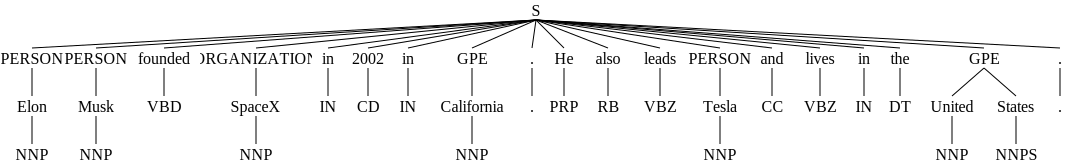

In [30]:
named_entities